<!-- ##### About dataset
##### Zomato Restaurant contains the following variables:
#####    • Restaurant Id: Unique id of every restaurant across various cities of the world
#####    • Restaurant Name: Name of the restaurant
#####    • Country Code: Country in which restaurant is located
#####    • City: City in which restaurant is located
#####    • Address: Address of the restaurant
#####    • Locality: Location in the city
#####    • Locality Verbose: Detailed description of the locality
#####    • Longitude: Longitude coordinate of the restaurant's location
#####    • Latitude: Latitude coordinate of the restaurant's location
#####    • Cuisines: Cuisines offered by the restaurant
#####    • Average Cost for two: Cost for two people in different currencies
#####    • Currency: Currency of the country
#####    • Has Table booking: yes/no
#####    • Has Online delivery: yes/ no
#####    • Is delivering: yes/ no
#####    • Switch to order menu: yes/no
#####    • Price range: range of price of food
#####    • Aggregate Rating: Average rating out of 5
#####    • Rating color: depending upon the average rating color
#####    • Rating text: text on the basis of rating of rating
#####    • Votes: Number of ratings casted by people -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Importing Dataset -- Link : https://github.com/Marvik-co/LinkedIn_30_Days/tree/main/Day1

In [3]:
data_zomato = pd.read_csv("zomato.csv", encoding="latin-1")
data_zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
data_zomato.shape

(9551, 21)

In [5]:
data_country = pd.read_excel("Country-Code.xlsx")
data_country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
data_country.shape

(15, 2)

#### Merging Both the tables on Country Code

In [7]:
df = pd.merge(data_zomato, data_country, on='Country Code')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


Now let see the columns of the data -- Datatypes of each columns and Basic statistics of all numerical columns

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Understanding the data
    1. Checking for any missing values

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

    1.1.This will give the names of all columns hving null values

In [12]:
[column for column in df.columns if df[column].isnull().sum()>0]

['Cuisines']

    1.2.Visualisation

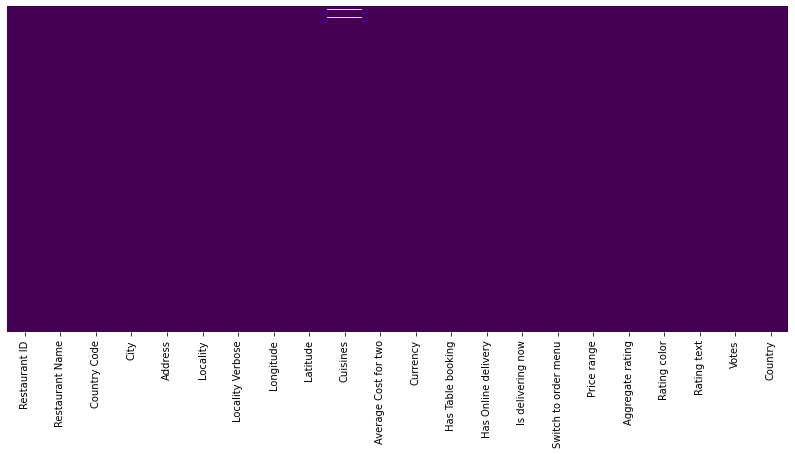

In [13]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### Observation : Only Column Cuisines have missing values

    2. Checking for outliers
        2.1. Visualisation -- box plot

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtype==int or df[feature].dtype==float]

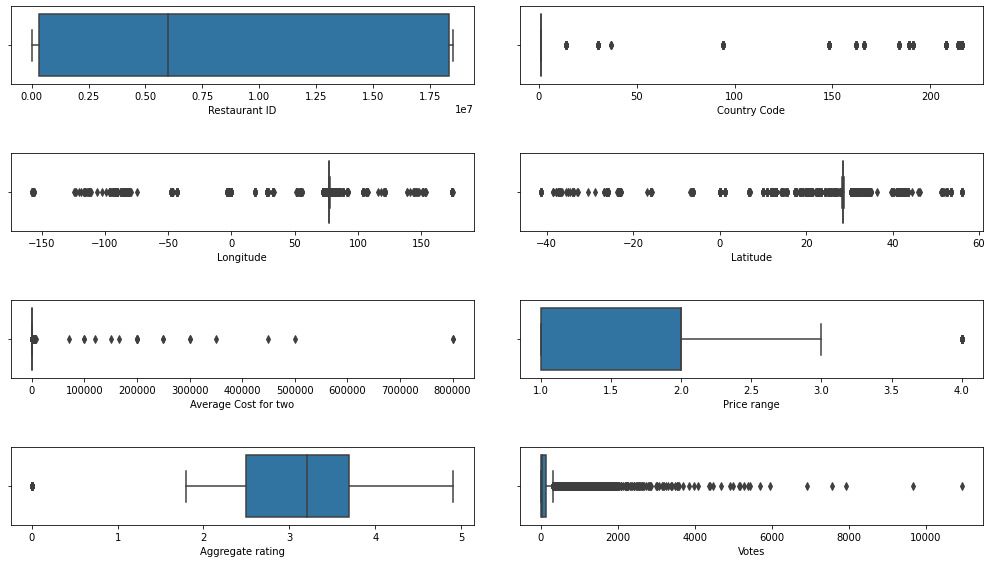

In [15]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
for i in range(8):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[numerical_features[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=1,
                    wspace=0.1,
                    hspace=0.9)
plt.show()

        2.2. Distplot and histogram

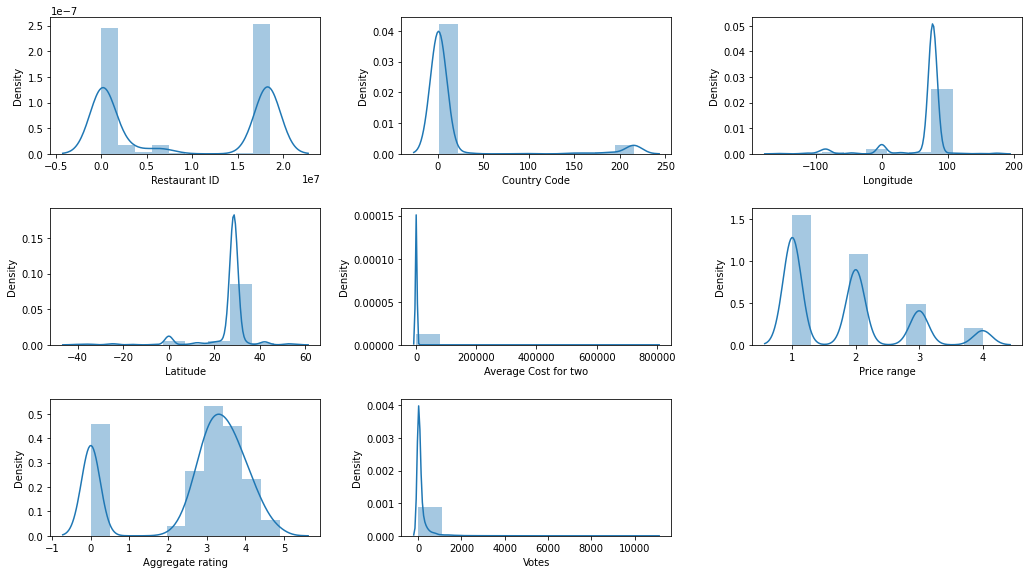

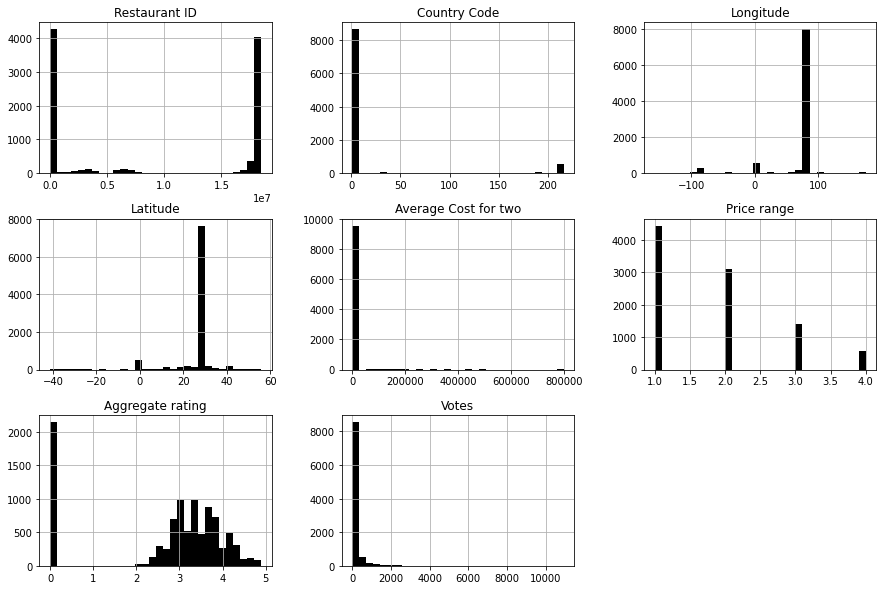

In [16]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=1,
                    wspace=0.3,
                    hspace=0.4)
    sns.distplot(df[numerical_features[i]], bins=10)
plt.show()
# matplotlib.rcParams['figure.figsize'] = (8, 4)
df.hist(color='k', 
       bins=30,
       figsize=(15,10))
plt.show()

    3. Checking for correlation
        3.1. Correlation Matrix

In [17]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


        3.2. Visualisation

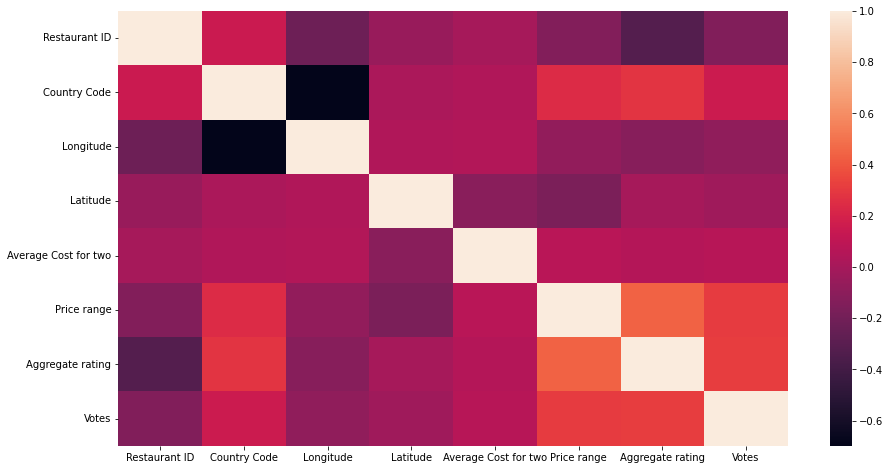

In [18]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr())
plt.show()

### Data Analysis -- Answering Questions

    1. Which country have the highest transaction?

In [19]:
country_names=df.Country.value_counts().index
country_val=df.Country.value_counts().values

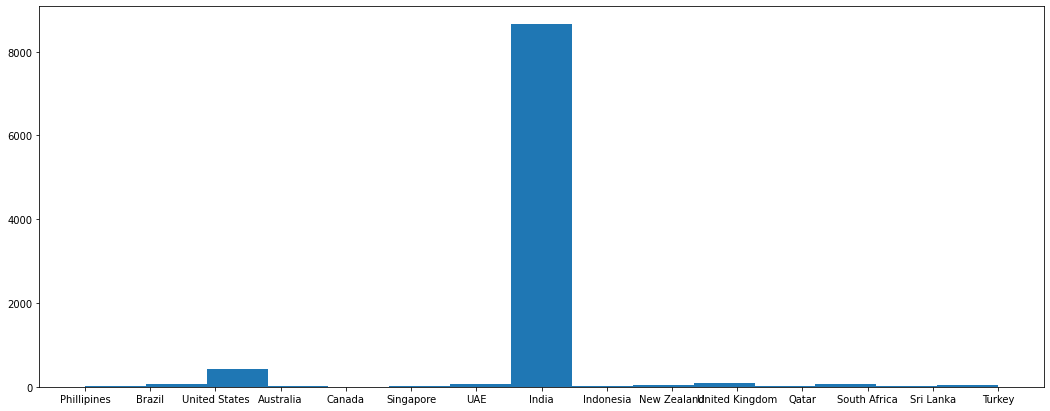

In [20]:
# plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
matplotlib.rcParams['figure.figsize'] = (18,7)
plt.hist(df['Country'],bins=15)
plt.show()

#### Observation : India have maximum Zomato Transaction followed by USA and then United Kingdoms

    2. Rating review

In [21]:

ratings=df.groupby(['Aggregate rating',
                    'Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [22]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


    Observation :
        When Rating is between 4.5 to 4.9 ---> Excellent
        When Rating is between 4.0 to 4.4 ---> Very good
        when Rating is between 3.5 to 3.9 ---> Good
        when Rating is between 3.0 to 2.9 ---> Average
        when Rating is between 2.0 to 2.4 ---> Poor

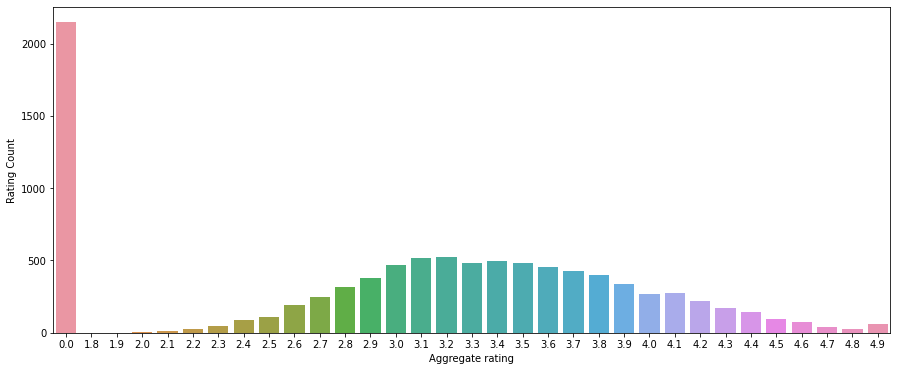

In [23]:
matplotlib.rcParams['figure.figsize'] = (15, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)
plt.show()

In [24]:
temp=['Pink' if color=='White' else 'Black' if color=='Dark Green' else color for color in df['Rating color']]
df['Rating color'][:]=temp

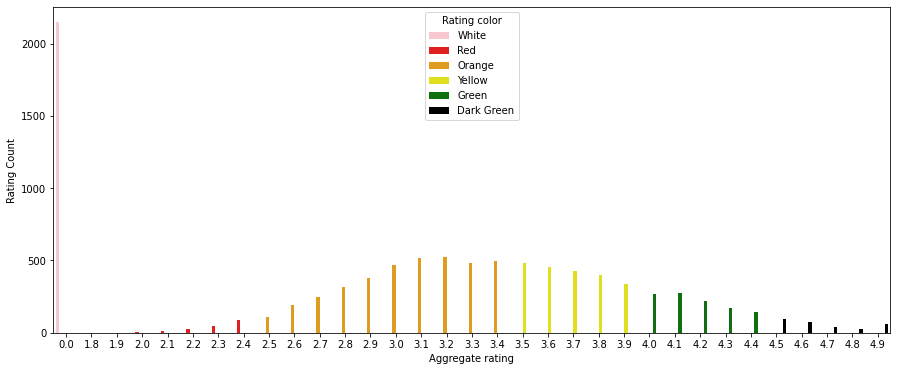

In [25]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',
            data=ratings,palette=['pink','red','orange','yellow','green','black'])
plt.show()

    Observation : 
        Not Rated count is very high -- BLUE LINE
        Maximum number of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

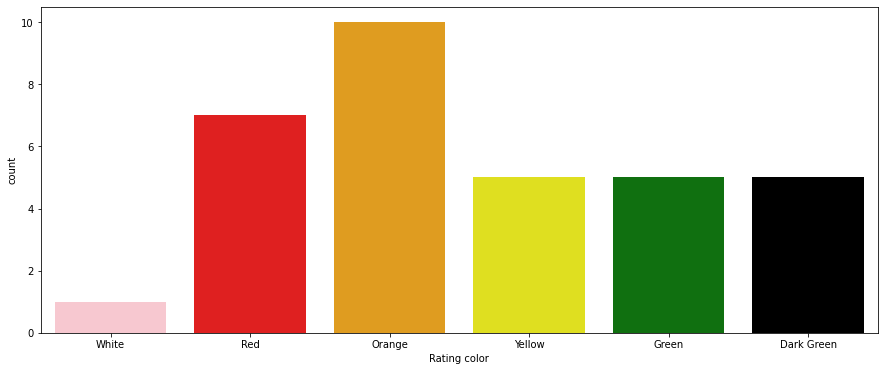

In [26]:
## Count plot
sns.countplot(x="Rating color",data=ratings,palette=['pink','red','orange','yellow','green','black'])

    3. Find the countries name that has given 0 rating 

In [27]:
df[df['Rating color']=='Pink'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [28]:
df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


    Observations Maximum number of 0 ratings are from Indian customers

    4. find out which currency is used by which country?

In [29]:
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


    5. Which Countries do have online deliveries option?

In [30]:
df[df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [31]:
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


    Observations :
        Online deliveries are available in India and UAE

    6. Which cities have the highest transactions?

In [32]:
df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Guwahati', 'Amritsar', 'Lucknow', 'Ahmedabad',
       ...
       'Mayfield', 'Macedon', 'Lorn', 'Lakes Entrance', 'Inverloch',
       'Huskisson', 'Panchkula', 'Forrest', 'Flaxton', 'Chatham-Kent'],
      dtype='object', length=141)

In [33]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index

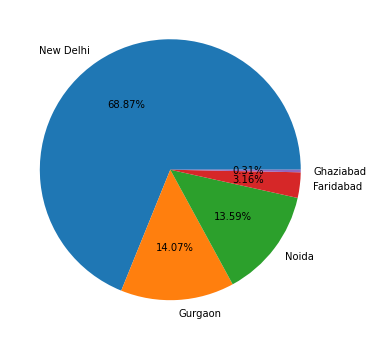

In [34]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

    Observation : 
        New Delhi has the highest number of transactions

    7. Which cuisine have highest sale?

In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [36]:
cuisine_count=df.Cuisines.value_counts().values
cuisine_label=df.Cuisines.value_counts().index

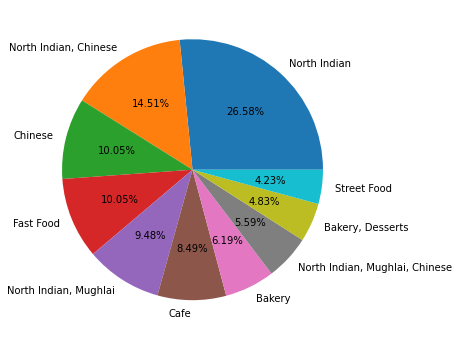

In [37]:
plt.pie(cuisine_count[:10],labels=cuisine_label[:10],autopct='%1.2f%%')
plt.show()

In [38]:
df[['Cuisines']].groupby(['Cuisines']).size().sort_values(ascending=False)[:10]

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
dtype: int64

    Observation :
        North Indian has the highest sales.